In [ ]:
import random
import time 
import numpy as np 

# def genarateRandomGin(length):
#   return ''.join([ '1' if random.randint(0, 100)%2==0 else '0' for _ in range(length)])
  
  # gin= ''
  # for _ in range(length):
  #   j= random.randint(0, 100)
  #   if j%2==0:
  #     gin+='1'
  #     continue
  #   gin+='0'
  # return gin

# %time genarateRandomGin(10)
# num_particals=3
# num_blocks=3
# genlength=10
# gins=[]
# for i in range(num_particals):
#         gins.append(genarateRandomGin(num_blocks* genlength))

# np.array(gins)[0]
loss = np.array([])

print(loss[0])
# loss = [0.6]

IndexError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/MangoLeafBD.zip

In [ ]:
# !tar -xvf /content/drive/MyDrive/temp/fire_dataset.tar

In [ ]:
import os,gc
import numpy as np 
import time
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import backend as K
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import add
import random
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
import pathlib
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
pathtrain='/content/MangoLeafBD Dataset'
# pathValid='/content/Agun_magun/validation'


datasetDirs=[pathlib.Path(pathtrain)]
imageSize=(180,180)
def Imagepreprocess(filename):
  global imageSize
  lower = np.array([7, 12,193])
  upper = np.array([30, 255, 255])
  
  
  
  # return img

  img = cv2.imread(filename)
  img=cv2.resize(img,imageSize)


  if img is None:
    raise FileNotFoundError

  # It converts the BGR color space of image to HSV color space
  #hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # # preparing the mask to overlay
  #mask = cv2.inRange(hsv, lower, upper)

  # # The black region in the mask has the value of 0,
  # # so when multiplied with original image removes all non-blue regions
  #res= cv2.bitwise_and(img, img, mask = mask)

  return img

labels=[]
imagesFilename=[]


for datasetDir in datasetDirs:
  for dir in datasetDir.iterdir():
    # dir.name
    for filename in dir.glob('*[.jpg|.png]'):
      print(str(filename))
      try:
        if cv2.imread(str(filename)) is None:
          continue
        
        imagesFilename.append(str(filename))
        # cv2_imshow(Imagepreprocess(str(filename)))
        # plt.show()
        labels.append(dir.name)
      except:
        pass


images=[Imagepreprocess(filename) for filename in imagesFilename]
# labels=(labels for label in labels)

      

      





    




/content/MangoLeafBD Dataset/Die Back/IMG_20211027_194824 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_162141 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_160902 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_160923 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_162043 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_162102 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_160453 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_162415 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_161849 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_163006 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/IMG_20211027_193637 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/IMG_20211027_185934 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_161922 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_164422 (Custom).jpg
/content/MangoLeafBD Dataset/Die Back/20211129_160

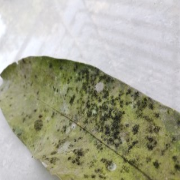

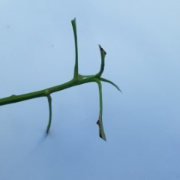

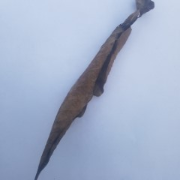

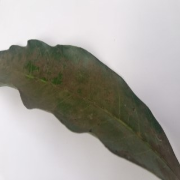

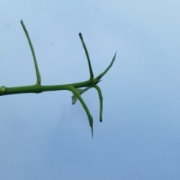

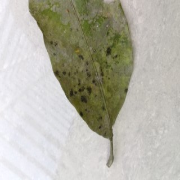

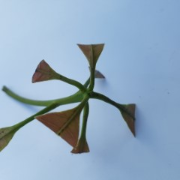

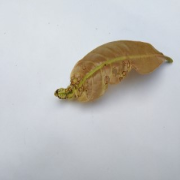

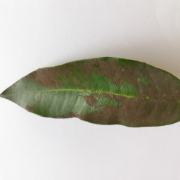

In [ ]:


for i in range(1,10):
  cv2_imshow(images[np.random.randint(0,2000)])
  print()


In [ ]:


from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
labels_enc = onehotencoder.fit_transform(np.array(labels).reshape(-1,1)).toarray()



In [ ]:
print(np.array(labels))
print(labels_enc)

['Die Back' 'Die Back' 'Die Back' ... 'Bacterial Canker'
 'Bacterial Canker' 'Bacterial Canker']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
import os

os.environ['MODEL_SAVED_NAME']='180x180_mango_leaf_cls_'


In [ ]:
# testRatio=0.4
# valRatio=0.5
# x_train, x_test, y_train, y_test=train_test_split(np.array(images), labels_enc, test_size=testRatio)
# # x_train, x_test, y_train, y_test=train_test_split(np.array(images), labels_enc[:,0], test_size=testRatio)
# x_test, x_validation, y_test, y_validation=train_test_split(x_test, y_test, test_size=valRatio)

#  training set should be made up of ~70% of your data, then devote 10% to the validation set, and 20% to the test set, like so,

x_train, x_validation, y_train, y_validation = train_test_split(np.array(images), labels_enc[:,0], train_size=0.9, test_size=0.1, random_state=42)# Create the Test and Final Training Datasets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size=0.78, random_state=42)

In [ ]:
def makeFlore(*args):
  args=list(args)
  for i in range(len(args)):
    args[i]=np.floor(args[i])
  return args

a,b=makeFlore(1.2,536.8)
print(a,b)

1.0 536.0


In [ ]:
len(labels)

4000

In [ ]:


class ModelBuilder:
  def __init__(self,num_blocks=3,num_layers_per_block=4,epochs=2):
    '''
    num_layers_per_block except for input layer , 
    '''
    self.num_blocks=num_blocks
    self.num_layers_per_block=num_layers_per_block
    self.skipConnectingArray=[]
    self.epochs=epochs
    self.genlenght=0
    
    for i in range(self.num_layers_per_block+1,1,-1):
      self.genlenght+= (i-1)
      self.skipConnectingArray.append(i-1)
    
    pass 
  def preprocessing(self,dataGen,x_train,y_train,validation_data,test_data,input_shape,number_of_cls=8,class_mode='catagorical'):

    dataGen,x_train,y_train,validation_data,test_data
    '''
    this funcion prepair image dataset
    **********************************
    params:
      dataGen: object -> ImageDataGenerator object 

       x_train: np.array -> train images
       y_train: np.array -> train labels

       validation_data: (x_validation,y_validation) : (np.array,np.array)
       test_data: (x_test,y_test) : (np.array.np.array)


      class_mode: string -> class_mode One of "categorical", "binary".
          Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels

      input_shape: tuple of lenght 3 -> . for example, (256,256,3)

      interpolation: String, the interpolation method used when resizing images.
        Default to bilinear. (Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic )

    '''
    
    self.class_mode=class_mode
    self.input_shape=input_shape

    self.dataGen=dataGen
    self.validation_data=validation_data
    self.test_data=test_data
    self.x_train=x_train
    self.y_train=y_train

    self.number_of_cls=number_of_cls

  def getloss(self,idx=0):
    
    if self.class_mode=='binary':
      return [tf.keras.losses.binary_crossentropy]
    else:
      looses=[tf.keras.losses.CategoricalCrossentropy(),
              tf.keras.losses.sparse_categorical_crossentropy,
              tf.keras.losses.Poisson,
              tf.keras.losses.KLDivergence]
      if idx>=0 and idx<=3:
        return looses[idx]
      else:
        return looses[0]

  def ginToSkipConnectionIndices(self,ginstr,ginDividerArray,totalBlocksize,currentBlock):

    '''
    @ginstr: str -> gin; example: 110111
    @ginDividerArray: list[int] -> gin subdivider index ; example: [3,2,1] for above gin string ['110','11','1']
    @totalBlocksize : int -> number of individual block ; ex: {1....n}
    @currentBlock: int -> current layer/block number ; ex: {1...n}
    @return:  list[int] -> previous layer indices  for skip connection
    '''
    ginidx=0
    layeridx=[]
    for i,dividerIdx in enumerate(ginDividerArray):
      if currentBlock>totalBlocksize-dividerIdx and currentBlock<= totalBlocksize:
        subgin=ginstr[ginidx:ginidx+dividerIdx]
        # print(subgin)
        currentBlcok_gin_idx=(currentBlock-1)-(totalBlocksize-len(subgin))
        if subgin[currentBlcok_gin_idx]=='1':
          layeridx.append(i)
        ginidx+=dividerIdx
    # print(layeridx) 
    return layeridx
  def H( self, inputs, num_filters , dropout_rate ):
    eps = 1.1e-5
    x = tf.keras.layers.BatchNormalization( epsilon=eps )( inputs )
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D((1, 1))(x)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size=(3, 3), use_bias=False , kernel_initializer='he_normal' )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate )(x)
    return x
  def transition(self,inputs, num_filters , compression_factor , dropout_rate ):
    # compression_factor is the 'θ'
    eps = 1.1e-5
    x = tf.keras.layers.BatchNormalization( epsilon=eps )(inputs)
    x = tf.keras.layers.Activation('relu')(x)
    num_feature_maps = inputs.shape[1] # The value of 'm'

    x = tf.keras.layers.Conv2D( np.floor( compression_factor * num_feature_maps ).astype( np.int ) ,
                               kernel_size=(1, 1), use_bias=False, padding='same' , kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )(x)
    x = tf.keras.layers.Dropout(rate=dropout_rate)(x)
    
    x = tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    return x
  
  def dense_block( self,inputs, num_layers, num_filters, growth_rate , dropout_rate,gin ):
    layers=[inputs]
    for i in range(2,num_layers+1+1): # num_layers is the value of 'l'
        conv_outputs = self.H(inputs, num_filters , dropout_rate )
        
        if(num_layers+1-3<=i):
          layersIdx=self.ginToSkipConnectionIndices(ginstr=gin,\
		                                     ginDividerArray=self.skipConnectingArray,\
																				                   totalBlocksize=num_layers+1,\
																													          currentBlock=i)
		
          inputs = tf.keras.layers.Concatenate()([conv_outputs, *[layers[idx] for idx in layersIdx]])
        else:
          inputs=conv_outputs
        

        layers.append(inputs)
        num_filters += growth_rate # To increase the number of filters for each layer.
    return inputs, num_filters
  # growth_rate,dropout_rate,compress_factor
  def denseNet_model(self,batch_size,num_filters,growth_rate,dropout_rate,compress_factor,num_of_nuron,ginstr):
  # def denseNet_model(self,batch_size,num_filters,*cg_fector,num_of_nuron,ginstr):

    # [[batch_size,num_filters,groth_rate,dropout_rate,compress_factor,num_of_nuron,learring_rate],ginstr]
    # num_blocks = 3
    # num_layers_per_block = 4
    # growth_rate = 16#*
    # batch_size,num_filters,growth_rate,dropout_rate,compress_factor,num_of_nuron=makeFlore(batch_size,num_filters,growth_rate,dropout_rate,compress_factor,num_of_nuron)
    dropout_rate = dropout_rate/100#*
    compress_factor = compress_factor/100#*

  


    # num_filters = 16#*

    # ginstr=['1111111111','1111111111','1111111111']
    chunks, chunk_size = len(ginstr), len(ginstr)//self.num_blocks

    ginstr=[ ginstr[i:i+chunk_size] for i in range(0, chunks, chunk_size) ]

    inputs = tf.keras.layers.Input( shape=self.input_shape )
    x = tf.keras.layers.Conv2D( num_filters , kernel_size=( 7 , 7 ),strides=(2, 2) , kernel_initializer='he_normal' , kernel_regularizer=tf.keras.regularizers.l2( 1e-4 ) )( inputs )
    x=tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    for i in range( self.num_blocks ):
      # growth_rate,dropout_rate,compress_factor=cg_fector[i],cg_fector[i+1]/100,cg_fector[i+1]/100
      x, num_filters = self.dense_block( x, self.num_layers_per_block , num_filters, growth_rate , dropout_rate,ginstr[i] )
      x = self.transition(x, num_filters , compress_factor , dropout_rate )

    x = tf.keras.layers.GlobalAveragePooling2D()( x ) 
    x= tf.keras.layers.Flatten()(x)
    x= tf.keras.layers.Dense(num_of_nuron,activation='relu')(x)

    x = tf.keras.layers.Dense( self.number_of_cls )( x ) # Num Classes 
    
    outputs = tf.keras.layers.Activation( 'sigmoid' if self.number_of_cls==1 else 'softmax' )( x )

    
    model = tf.keras.models.Model( inputs , outputs )
    model.compile( loss=self.getloss() ,optimizer=tf.keras.optimizers.Adam( learning_rate=0.0001 ) ,metrics=[ 'acc' ])
    # model.summary()
    # print('batch size* ',batch_size)

    model.fit(self.dataGen.flow(self.x_train, self.y_train,batch_size),
      epochs=self.epochs,
      validation_data=self.validation_data,
      )
    results = model.evaluate(self.test_data[0],self.test_data[1]) # return [loos, acc]
    gc.collect()
    K.clear_session()

    #          loss,    acc
    return results[0], results[1], model



      

  def get_kernel(self,indx_num=1):
    indx_num=round(indx_num)
    '''
    this funcion return karnel size which ref by indx number (1 - 4) 
    indx_num : 1 -> (3,3)
    indx_num : 2 -> (5,5)
    indx_num : 3 -> (7,7)
    indx_num : 4 -> (9,9)
    '''
    kernal_sizes=[(3,3),
                  (5,5),
                  (7,7),
                  (9,9)]
    if indx_num>=1 and indx_num<=4:
      return kernal_sizes[indx_num-1]
    else:
      return kernal_sizes[0]


    

    





In [ ]:
# authoer : tumzied


import numpy as np
from numpy.core.fromnumeric import size
import json
import os


class NumpyEncoder(json.JSONEncoder):
  def default(self, obj):
      if isinstance(obj, np.ndarray):
          return obj.tolist()
      return json.JSONEncoder.default(self, obj)

def minimize_pso(cost_func, num_dimensions, num_iterations):
  num_particles = num_dimensions * 2
  swarm = ParticleSwarm(cost_func, num_dimensions, num_particles)
  return swarm.minimize(num_iterations)


class PSOResult(object):
  def __init__(self, best_particle, best_score, num_iterations):
      self.best_particle = best_particle
      self.best_score = best_score
      self.num_iterations = num_iterations




class ParticleSwarm(object):



  
  def __init__(self, cost_func,num_particles, num_dimensions, bounds,epochs=4,num_blocks=3,num_layers_per_block=4, chi=0.72984, phi_p=2.05, phi_g=2.05,w=np.random.uniform()):
    self.cost_func = cost_func
    self.num_dimensions = num_dimensions
    self.bounds=bounds
    self.num_blocks=num_blocks
    self.num_layers_per_block=num_layers_per_block
    self.epochs=epochs



    self.xmax= np.ones((num_particles,num_dimensions))*bounds[1].reshape(-1,num_dimensions)
    self.xmin= np.ones((num_particles,num_dimensions))*bounds[0].reshape(-1,num_dimensions)

    self.num_particles = num_particles
    self.chi = chi
    # w, is the inertia weigh
    self.w= w


    self.phi_p = phi_p #: acceleration coeffection (cognitive factor)

    self.phi_g = phi_g #: acceleration coeffection (social factor)
    # Initialize the swarm (population) form the solution space.
    self.X = np.random.uniform(low=bounds[0],high=bounds[1],size=(num_particles,len(bounds[0])))
      # np.random.uniform(size=(self.num_particles, self.num_dimensions)) #particle’s position
    self.V = np.random.uniform(low=bounds[0],high=bounds[1],size=(num_particles,len(bounds[0])))
      #np.random.uniform(size=(self.num_particles, self.num_dimensions)) # path direction
    self.X = np.round(self.X)
    self.P = self.X.copy() #best position of the particle

    # genarate gin for each particals 

    self.genlenght=0 #gin length for each block 
    for i in range(self.num_layers_per_block+1,1,-1):
      self.genlenght+= (i-1)

    # genarate gin => [ num_blocks* genlength]* num_particals
    self.gins=[]
    self.best_gin=[]
    for i in range(self.num_particles):
      self.gins.append(self.genarateRandomGin(num_blocks* self.genlenght))





    self.S,self.acc,self.models,seletedGins = self.cost_func(epochs,num_blocks,num_layers_per_block,self.X,self.gins)  # evaluitng the initial postion 
    self.S=np.array(self.S)
    self.acc=np.array(self.acc)
    self.gins=np.array(seletedGins)

    min_loss_idx=self.S.argmin()
    # self.best_model=self.models[min_loss_idx]
    self.best_gin.append(self.gins[min_loss_idx])

    self.g = self.P[min_loss_idx] # Evaluate the fitness of each particle according to the objective function
    self.best_score = self.S.min() #best position of the swarm
    self.cost_history=[]
    self.p_pos_history=[]
    self.acc_history=[self.acc[min_loss_idx]]
    self.cost_history.append(self.best_score)

  def roulette_wheel_selection(self,population):
    def sigmoid(x):
        return 1/(1+np.exp(-x))
    # population = [ sigmoid(p) for p in population]
    minp=np.min(population)
    maxp=np.max(population)
    population=[(p-minp)/(maxp-minp) for p in population]
  
    # Computes the totallity of the population fitness
    population_fitness = sum([1-fitness for fitness in population])
    
    # Computes for each chromosome the probability 
    chromosome_probabilities = [(1-fitness)/population_fitness for fitness in population]
    
    # Making the probabilities for a minimization problem
    chromosome_probabilities =  np.array(chromosome_probabilities)
    
    # Selects one chromosome based on the computed probabilities
    return np.random.choice(range(len(population)), len(population), p=chromosome_probabilities)
    
  def genarateRandomGin(self,length):
    return ''.join([ '1' if random.randint(0, 100)%2==0 else '0' for _ in range(length)])


  def singlepointCrossover(self,a,b):
    
    '''

    only apply crossover method to string 
    @return : string -> crossover a,b gin 
    
    '''
    a=list(a)
    b=list(b)

    # if (type(a)!=str or type(a)!=np._str )and ( type(b)!=np._str or type(b)!=str):
    #     raise TypeError(f'a and b must be string type given {type(a)} and {type(b)}')

    if len(a) == len(b):
        x=np.random.randint(0,len(a))
        
        new_a= a[:x]+b[x:]
        new_b=b[:x]+a[x:]
        return ''.join(new_a),''.join(new_b)
    else:
        raise ValueError(f'a and b mast be same lenght')
  def mutation(self,a,mutation_rate=0.1):
    '''
    randomly select a index to mutated 

    given   101
            ^
    return  111

    '''
    a=list(a)
    # num_of_mutation=np.random.randint(0,5)
    # mutation_rate
    for i in range(len(a)):
      if np.random.rand()<mutation_rate:
        a[i]= '0' if a[i] == '1' else '1'

    return ''.join(a)

  def _update(self):
    # Velocities update
    # 𝑟1, 𝑟2: random variable from 0:1

    R_p = np.random.uniform(size=(self.num_particles, self.num_dimensions))
    R_g = np.random.uniform(size=(self.num_particles, self.num_dimensions))

    self.V = self.chi * (self.V*self.w \
            + self.phi_p * R_p * (self.P - self.X) \
            + self.phi_g * R_g * (self.g - self.X))



    # reflect method reflects the position
    # x_idx= self.X>self.xmax
    # self.X[x_idx]=self.xmax[x_idx] -(self.X[x_idx]-self.xmax[x_idx])

    # x_idx= self.X<self.xmin
    # self.X[x_idx]=self.xmin[x_idx] +(self.xmax[x_idx]-self.X[x_idx])

    #Boundary handling{ hyperbolic method }
    gz_idx= self.V>=0
    lz_idx= self.V<0

    self.V[gz_idx]=(self.V[gz_idx])/(1+np.abs((self.V[gz_idx])/(self.xmax[gz_idx]-self.X[gz_idx])))
    
    self.V[lz_idx]=(self.V[lz_idx])/(1+np.abs((self.V[lz_idx])/(self.X[lz_idx]-self.xmin[lz_idx])))

    # Positions update
    self.X = self.X + self.V

    self.X=np.round(self.X)

    self.X= np.abs(self.X)

    
    cgins=self.gins.copy() #canditate gin 

    # print('canditate gins',cgins)


    # gin selection 
    print(self.S)
    selectedIdx=self.roulette_wheel_selection(self.S)
    cgins=[cgins[i] for i in selectedIdx]

    print('canditate gins after selection',cgins)
    print('selection idx',selectedIdx)


    # crossover 
    for i in range(0,len(cgins),2):
      if i+1!=len(cgins):
        print('crossover: ',cgins[i],' and ',cgins[i+1])
       
        
        cgins[i],cgins[i+1]=self.singlepointCrossover(cgins[i],cgins[i+1])
    
    # mutation

    for i in range(len(cgins)):
      cgins[i]=self.mutation(cgins[i],1/len(cgins[i]))


    

    




    # eveluting score 
    scores,acc,cmodels,sgins = self.cost_func(self.epochs,self.num_blocks,self.num_layers_per_block,self.X,cgins)
    scores= np.array(scores)
    acc= np.array(acc)

    
    better_scores_idx = scores < self.S # it reaturn true or false base on this condtion for each items 

    
    # Update particle’s position:
    self.P[better_scores_idx] = self.X[better_scores_idx]
    self.S[better_scores_idx] = scores[better_scores_idx]
    self.acc[better_scores_idx] = acc[better_scores_idx]
    

    for idx,bools in enumerate(better_scores_idx):
      if bools:
        # self.models[idx]=cmodels[idx]
        self.gins[idx] = sgins[idx]
    



    



    self.g = self.P[self.S.argmin()]
    # self.best_model=self.models[self.S.argmin()]

    self.best_gin.append(self.gins[self.S.argmin()])


    # Determine the best particle according to the swarm.
    self.best_score = self.S.min()
    self.cost_history.append(self.best_score)
    self.acc_history.append(self.acc[self.S.argmin()])
    self.p_pos_history.append(self.P.tolist()) #track partical postion history 


  def minimize(self, max_iter):

    timeStamp=round(time.time())
      
    for i in range(max_iter):
      print("\n****************************iteration -> ",i,'****************************\n')
      self._update()
      
      r={
          'best_particle':self.g,
          'best_score':self.best_score,
          'num_iterations':max_iter,
          'cost_history':list(self.cost_history),
          'acc_history':list(self.acc_history),
          'partical_pos_history':list(self.p_pos_history),
          'best_gins':self.best_gin
      }
      try:

        model_name=f'/content/drive/MyDrive/{os.environ["MODEL_SAVED_NAME"]}_loss_{self.best_score}_model{timeStamp}'
        # self.best_model.save(f'{model_name}.h5')

        # converter = tf.lite.TFLiteConverter.from_keras_model(self.best_model)
        # tflite_model = converter.convert()

        # Save the model.
        # with open(f'{model_name}.tflite', 'wb') as f:
        #   f.write(tflite_model)

      except:
        pass 
        
      try:
        print(json.dumps(r,cls=NumpyEncoder),file=open(f'{model_name}.json','w'))
      except:
        pass 
    return r






In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator

class_mode='catagorical'

target_size=imageSize


dataGen=ImageDataGenerator(
	width_shift_range=0.1,
	height_shift_range=0.1,
	zoom_range=0.2,
	shear_range=0.1,
	rotation_range=10,
  )

dataGen.fit(x_train)

validation_data=(x_validation,y_validation)
test_data=(x_test,y_test)

def evluate_CNN(epochs,num_blocks,num_layers_per_block,particals,gins):
  '''
  return particals loos, and models 
  '''
  global dataGen,x_train,y_train,validation_data,test_data,target_size,class_mode

  input_shape=(*target_size,3)
  particals_loss=[]
  particals_acc=[]
  # print(particals.shape)
  models_path=[]
  particalsSelectedGins=[]
  for i,partical in enumerate(particals):

    partical=partical.astype(np.int64)
    print('batch size ', partical[0])
    tloss=1e6
    tacc=1e6
    tmodel=None
    selectedGin=None
    for gin in gins:

      mbilder= ModelBuilder(num_blocks=3,num_layers_per_block=4,epochs=epochs)
      mbilder.preprocessing(dataGen,x_train,y_train,validation_data,test_data,input_shape,number_of_cls=1,class_mode=class_mode)
      loss,acc,model=mbilder.denseNet_model(*partical,ginstr=gin)
      # loss,model=mbilder.denseNet_model(*partical[0:-1],num_of_nuron=partical[-1],ginstr=gin)
      del mbilder
      del model
      gc.collect()
      # loss=np.random.rand()
      if loss < tloss:
        tloss=loss
        tacc=acc
        # tmodel=model

        selectedGin=gin 






    particals_loss.append(tloss)
    particals_acc.append(tacc)
    # models_path.append(tmodel)
    particalsSelectedGins.append(selectedGin)
  # particals_loss.append(np.random.uniform())
  # models.append(np.random.uniform())


  return particals_loss,particals_acc,models_path,particalsSelectedGins

In [ ]:
# batch_size,num_filters,(groth_rate,dropout_rate,compress_factor)*numbers_of_Block,num_of_nuron
# mins=[10,10, 8,10,10,8,10,10,8,10,10, 15]
# maxs=[32,128,100,30,90,100,30,90,100,30,90,500]

## HISTORY

# T1: 
num_particles=4;epochs=6;num_blocks=3;num_layers_per_block=4;tag='t1'
# T2: 
# num_particles=2;epochs=2;num_blocks=9;num_layers_per_block=10;tag='t2' # <-- Current

# T3: 
#num_particles=10;epochs=8;num_blocks=3;num_layers_per_block=4;tag='t3'  # <-- Current

os.environ['MODEL_SAVED_NAME'] = os.environ['MODEL_SAVED_NAME'] +'_'+tag
mins=[10,10, 8,10,10, 15]
maxs=[32,128,100,30,90,500]

if len(mins)==len(maxs):
  bounds=(np.array(mins),np.array(maxs))

  swarm= ParticleSwarm(cost_func=evluate_CNN,num_particles=num_particles,num_dimensions=len(mins),\
                       bounds=bounds,epochs=epochs,num_blocks=num_blocks,num_layers_per_block=num_layers_per_block,\
                       chi=0.955, phi_p=1.45, phi_g=1.45,w=0.6)

  # result  
  result = swarm.minimize(max_iter=10)

batch size  30


<ipython-input-9-25ba7fc58e06>:104: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = tf.keras.layers.Conv2D( np.floor( compression_factor * num_feature_maps ).astype( np.int ) ,


Epoch 1/8
94/94 [==============================] - 37s 250ms/step - loss: 0.0130 - acc: 0.8173 - val_loss: 0.0129 - val_acc: 0.9050
Epoch 2/8
94/94 [==============================] - 19s 205ms/step - loss: 0.0130 - acc: 0.8704 - val_loss: 0.0130 - val_acc: 0.9050
Epoch 3/8
94/94 [==============================] - 20s 213ms/step - loss: 0.0132 - acc: 0.8704 - val_loss: 0.0133 - val_acc: 0.9050
Epoch 4/8
94/94 [==============================] - 19s 204ms/step - loss: 0.0135 - acc: 0.8704 - val_loss: 0.0137 - val_acc: 0.9050
Epoch 5/8
94/94 [==============================] - 20s 208ms/step - loss: 0.0139 - acc: 0.8704 - val_loss: 0.0142 - val_acc: 0.9050
Epoch 6/8
94/94 [==============================] - 19s 205ms/step - loss: 0.0145 - acc: 0.8704 - val_loss: 0.0149 - val_acc: 0.9050
Epoch 7/8
94/94 [==============================] - 20s 211ms/step - loss: 0.0153 - acc: 0.8704 - val_loss: 0.0157 - val_acc: 0.9050
Epoch 8/8
25/25 [==============================] - 2s 65ms/step - loss: 0.01

<ipython-input-10-6536b8b11348>:186: RuntimeWarning: divide by zero encountered in true_divide
  self.V[gz_idx]=(self.V[gz_idx])/(1+np.abs((self.V[gz_idx])/(self.xmax[gz_idx]-self.X[gz_idx])))


Epoch 1/8
108/108 [==============================] - 38s 222ms/step - loss: 0.0143 - acc: 0.8700 - val_loss: 0.0144 - val_acc: 0.9400
Epoch 2/8
108/108 [==============================] - 20s 187ms/step - loss: 0.0145 - acc: 0.9042 - val_loss: 0.0146 - val_acc: 0.9250
Epoch 3/8
108/108 [==============================] - 20s 188ms/step - loss: 0.0148 - acc: 0.8882 - val_loss: 0.0151 - val_acc: 0.9050
Epoch 4/8
108/108 [==============================] - 21s 195ms/step - loss: 0.0154 - acc: 0.8746 - val_loss: 0.0158 - val_acc: 0.9050
Epoch 5/8
108/108 [==============================] - 21s 191ms/step - loss: 0.0162 - acc: 0.8704 - val_loss: 0.0167 - val_acc: 0.9050
Epoch 6/8
108/108 [==============================] - 20s 186ms/step - loss: 0.0173 - acc: 0.8704 - val_loss: 0.0179 - val_acc: 0.9050
Epoch 7/8
108/108 [==============================] - 21s 191ms/step - loss: 0.0186 - acc: 0.8704 - val_loss: 0.0193 - val_acc: 0.9050
Epoch 8/8
25/25 [==============================] - 2s 95ms/ste

In [ ]:

# input_shape=(*target_size,3)
# mbilder= ModelBuilder(num_blocks=3,n/um_layers_per_block=4,epochs=10)
# mbilder.preprocessing(dataGen,x_train,y_train,validation_data,test_data,input_shape,number_of_cls=1,class_mode=class_mode)

# loss,model=mbilder.denseNet_model(*[18, 49.0, 43.0, 12.0, 65.0, 150.0],'010111111001111001011000110000')

aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [ ]:
aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [ ]:



a=[2, 5, 2, 5, 1, 5, 6]
a[0:-1]



[2, 5, 2, 5, 1, 5]